In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Preprocessing

In [2]:
#loading data from csv to dataframe
data = pd.read_csv('car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
#finding missing values

data.isna().sum()

Year     0
Price    0
dtype: int64

# Splitting the data into Training and Test Data

In [8]:
x = data.drop(['Price'],axis =1)
y = data['Price']

In [9]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [10]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

# Linear Regression

In [12]:
#loading linear regression model

lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [14]:
#prediction on Training data

train_data_pred = lr.predict(x_train)

In [28]:
#R squared Error
train_error_score = metrics.r2_score(y_train,train_data_pred)
print('R squared_train_Error:',train_error_score)

R squared_train_Error: 0.616198489839154


In [17]:
#prediction on test data

test_data_pred = lr.predict(x_test)

In [29]:
#R squared Error
test_error_score = metrics.r2_score(y_test,test_data_pred)
print('R squared_train_Error:',test_error_score)

R squared_train_Error: 0.41742044953883384


# Lasso Regression

In [19]:
lass_reg_model = Lasso(alpha=0.1)

In [20]:
lass_reg_model.fit(x_train,y_train)

Lasso(alpha=0.1)

Lasso Model Evaluation

In [22]:
#prediction on train data

train_data_pred = lass_reg_model.predict(x_train)

In [41]:
#R squared
train_error_score2 = metrics.r2_score(y_train,train_data_pred)
print('R squared Error:',train_error_score2)

R squared Error: 0.616198489839154


In [42]:
#prediction on test data

lass_reg_model.fit(x_test,y_test)

Lasso(alpha=0.1)

In [43]:
test_data_pred = lass_reg_model.predict(x_test)

In [46]:
test_error_score2 = metrics.r2_score(y_test,test_data_pred)
print('R squared_test_Error:',test_error_score2)

R squared_test_Error: 0.41742044953883384


In [47]:
print('Linear regression model')
print('R-squared train score:',train_error_score)
print('R squared test score:',test_error_score)



print('Lasso Regression')
print('R-squared score train :',train_error_score2 )
print('R-squared score test:', test_error_score2)

Linear regression model
R-squared train score: 0.616198489839154
R squared test score: 0.41742044953883384
Lasso Regression
R-squared score train : 0.616198489839154
R-squared score test: 0.41742044953883384


# LINEAR REGRESSION -Price prediction of second-hand model grand i10 for the year 2022 

In [49]:
year = 2022
price_pred_lr = lr.predict([[year]])
print('Predicted Price for 2022(Linear Regression):', price_pred_lr[0])

Predicted Price for 2022(Linear Regression): 715848.7360262275


C:\Users\Chippy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# LASSO REGRESSION - Price prediction of second-hand model grand i10 for the year 2022 

In [50]:
year = 2022
price_pred_lass = lass_reg_model.predict([[year]])
print('Predicted Price for 2022(Linear Regression):', price_pred_lass[0])

Predicted Price for 2022(Linear Regression): 715929.2246696055


C:\Users\Chippy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


<AxesSubplot:>

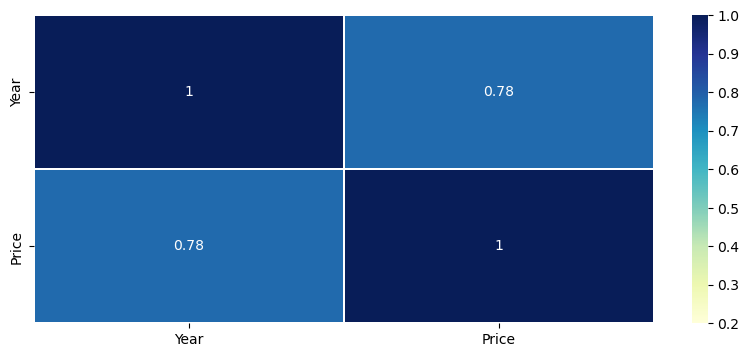

In [51]:
#to check correlation

corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=0.2,vmax=1,linewidth=0.3,cmap='YlGnBu')

# Price and year are highly correlated hence it shows best linear relationship

In [52]:
price_pred_lr = 715848.7360262275
price_pred_lass = 715929.2246696055

In [53]:
#compare price values

if price_pred_lr > price_pred_lass:
    print("Linear Regression is performing better",price_pred_lr)
else: 
    print("Lasso Regression is performing better",price_pred_lass)

Lasso Regression is performing better 715929.2246696055
